The probability of Presence is: 28.302263015752843%
The probability of Absence is: 71.69773698424716%


/var/folders/zk/qjgxhgc55t16ypwllyg4mh_00000gn/T/ipykernel_63977/4222991733.py:137: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('RdYlGn_r')


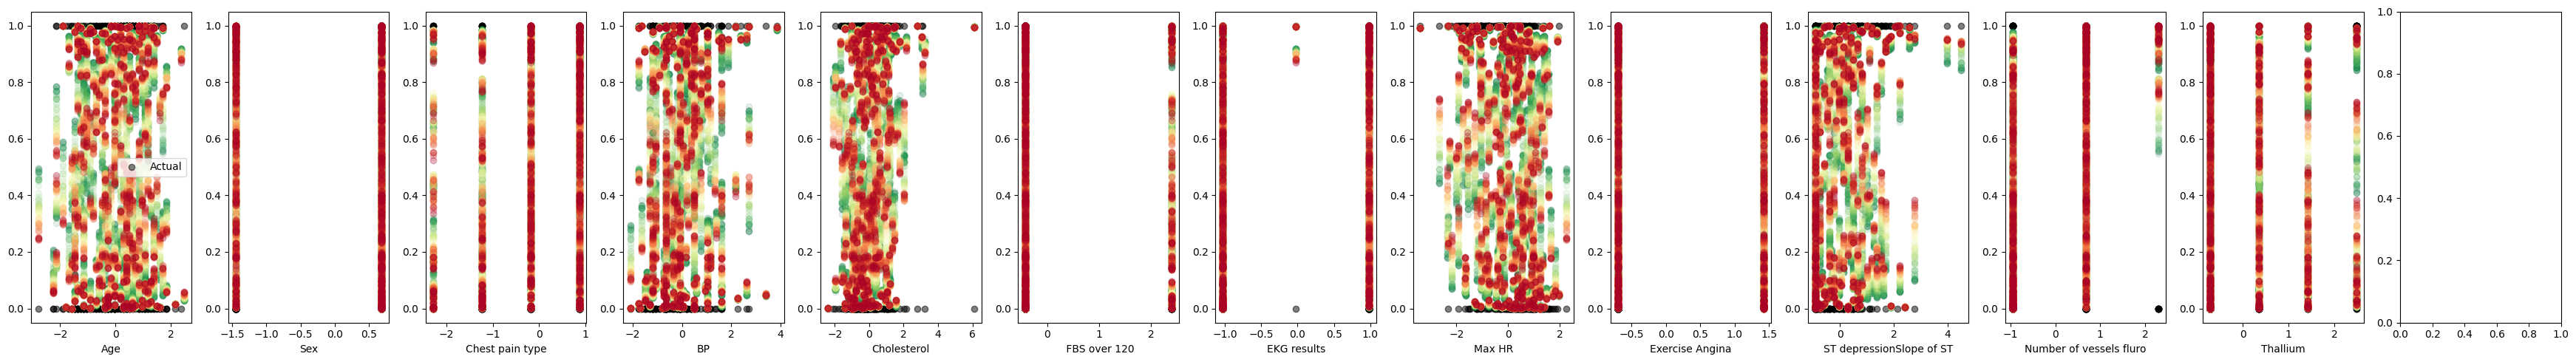

In [1]:
from re import A
from IPython.core.display import Math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm


class LogisticRegression:
  def __init__(self, epochs, lr):

    # model hyperparameters
    self.epochs = epochs
    self.lr = lr

    self.weights = None
    self.bias = None


  # normalize the x_data
  def normalize(self, x_input):
    x_input_norm = (x_input - self.x_mean)/(self.x_std)
    return x_input_norm

  # Sigmoid Function
  def activation(self,z):
    sigmoid = 1/(1 + np.exp(-z))
    return sigmoid

  # Cross Entropy (Negate Log-Likelihood Loss)
  def loss_function(self, y_label, y_hat):
    loss = -(y_label * np.log(y_hat)) + ((1 - y_label)* (np.log(1-y_hat)))
    return loss


  def training(self, x_data, y_label):

    x_data = x_data.values if isinstance(x_data, pd.DataFrame) else x_data
    y_label = y_label.reshape(-1, 1)

    # randomized array of shape (3,1) for weights and set bias equal to 0
    self.weights = np.random.randn(x_data.shape[1],1)  
    self.bias = 0

    #calculate mean and std dev
    self.x_mean = np.mean(x_data, axis=0)
    self.x_std = np.std(x_data, axis=0)

    x_norm = ((x_data - self.x_mean)/(self.x_std))

    predictions_per_epoch = []

    for training in range(self.epochs):
      for i in range(x_norm.shape[0]):

        xi = x_norm[i].reshape(1, -1)  
        yi = y_label[i].reshape(1, 1)

        #predict a y-value from given parameters
        z = np.dot(x_norm[i], self.weights) + self.bias
        y_hat = self.activation(z)

        loss = self.loss_function(y_label[i], y_hat)

        # Gradients
        dw = (y_hat - yi) * xi.T
        db = (y_hat - yi)

        # Update Rule - Gradient Descent on Cross Entropy
        self.weights -= self.lr * dw
        self.bias -= self.lr * db

        epoch_preds = self.activation(np.dot(x_norm, self.weights) + self.bias)
        predictions_per_epoch.append(epoch_preds.flatten())

    return np.array(predictions_per_epoch)


  def predict_probability(self, x_input):
    x_input = np.array(x_input)

    if x_input.ndim == 1:
        x_input = x_input.reshape(1, -1)

    x_input_norm = self.normalize(x_input)

    predict = np.dot(x_input_norm, self.weights) + self.bias
    probability = self.activation(predict)

    return probability


def init_data():
  file_path = "HeartDisease.csv"

  # initialize the dataset as a dataframe from pandas
  dataframe = pd.read_csv(file_path)

  # features and label of the given dataset
  x_data = dataframe.iloc[:, :-1]
  org_y_label = dataframe["Heart Disease"].values.reshape(-1,1)

  #convert into binary form
  y_label = np.zeros((x_data.shape[0], 1))

  for i in range(len(org_y_label)):
    if org_y_label[i] == "Presence":
      y_label[i] = 1
  
  return x_data, y_label

x_data1, y_label1 = init_data()

model = LogisticRegression(100, 0.01)
predict_values = model.training(x_data1, y_label1)

#input x data
x_input = np.array([[65	,1	,4	,120	,177	,0	,0	,140	,0	,0.4	,1	,0,7]])
prob = model.predict_probability(x_input)

#conversion
presence_value = prob[0][0]*100
absence_value = 100 - prob[0][0]*100

#percentage probability of being presence or absence of heart disease
print(f"The probability of Presence is: {presence_value}%")
print(f"The probability of Absence is: {absence_value}%")

#Normalize the dataset
x_data_norm = (x_data1 - model.x_mean) / model.x_std
x_data_norm = x_data_norm.values
y_label_flat = y_label1.flatten()

pred_array = np.array(predict_values)

# initialize colormap from green to red to show gradient descent
cmap = cm.get_cmap('RdYlGn_r')

# Scatter plot: true label vs predicted probability
fig, ax = plt.subplots(1,13, figsize= (35,5))

cols = ['Age','Sex', 'Chest pain type', 'BP', 'Cholesterol', ' FBS over 120',
        'EKG results', 'Max HR', 'Exercise Angina', 'ST depression' 'Slope of ST',
        'Number of vessels fluro', 'Thallium']

for i in range(12):
  
  ax[i].scatter(x_data_norm[:, i], y_label_flat, color='black', alpha=0.5, label='Actual')

  for epoch in range(model.epochs):
      color = cmap(epoch / model.epochs)  # normalized to [0,1]
      ax[i].scatter(x_data_norm[:, i], pred_array[epoch, :], color=color, alpha=0.1)

  ax[i].set_xlabel(cols[i])

  if i == 0:
    ax[i].legend()
  
plt.tight_layout()
plt.show()      
